In [1]:
%load_ext autoreload
%autoreload 2

import os
from pyciemss.PetriNetODE.interfaces import (
    load_and_sample_petri_model,
    load_and_calibrate_and_sample_petri_model,
    load_and_optimize_and_sample_petri_model,
    load_and_calibrate_and_optimize_and_sample_petri_model,
    posterior_density_petri_model
)
import numpy as np
import matplotlib.pyplot as plt
import torch
from pyciemss.visuals import plots

In [2]:
DEMO_PATH = "notebook/integration_demo/"
ASKENET_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/main/petrinet/examples/sir_typed.json"

## load_and_sample_petri_model

In [3]:
num_samples = 3
timepoints = [0.5, 1.0, 2.0, 3.0, 4.0]

# Run sampling w/o an intervention
result = load_and_sample_petri_model(ASKENET_PATH, num_samples, timepoints=timepoints, time_unit="days")

# Save results
result["data"].to_csv(os.path.join(DEMO_PATH, "results_petri/sample_results.csv"), index=False)
result["quantiles"].to_csv(
    os.path.join(DEMO_PATH, "results_petri/quantiles_results.csv"), index=False
)

In [6]:
result["data"]

,timepoint_id,sample_id,beta_param,gamma_param,I_sol,R_sol,S_sol,timepoint_days
0,0,0,0.027101,0.100008,975.410645,24.151377,1.437776e+00,0.5
1,1,0,0.027101,0.100008,929.208557,71.791214,3.557054e-06,1.0
2,2,0,0.027101,0.100008,840.776245,160.223526,-5.367998e-10,2.0
3,3,0,0.027101,0.100008,760.759888,240.239868,7.663109e-10,3.0
4,4,0,0.027101,0.100008,688.356628,312.641022,9.788135e-10,4.0
5,0,1,0.026785,0.142778,965.426392,33.814526,1.757868e+00,0.5
6,1,1,0.026785,0.142778,900.554810,100.444786,6.551736e-06,1.0
7,2,1,0.026785,0.142778,780.733765,220.266449,-7.677456e-10,2.0
8,3,1,0.026785,0.142778,676.854553,324.145477,-4.677141e-10,3.0
9,4,1,0.026785,0.142778,586.796936,414.203247,-3.676043e-10,4.0


In [7]:
result["quantiles"]

,timepoint_id,number_days,inc_cum,output,type,quantile,value,Forecast_Backcast
0,0,0.5,inc,I,quantile,0.010,9.636272e+02,Forecast
1,0,0.5,inc,I,quantile,0.025,9.636823e+02,Forecast
2,0,0.5,inc,I,quantile,0.050,9.637740e+02,Forecast
3,0,0.5,inc,I,quantile,0.100,9.639576e+02,Forecast
4,0,0.5,inc,I,quantile,0.150,9.641412e+02,Forecast
...,...,...,...,...,...,...,...,...
340,4,4.0,inc,S,quantile,0.850,8.026898e-10,Forecast
341,4,4.0,inc,S,quantile,0.900,8.613977e-10,Forecast
342,4,4.0,inc,S,quantile,0.950,9.201056e-10,Forecast
343,4,4.0,inc,S,quantile,0.975,9.494595e-10,Forecast


In [8]:
result["risk"]

{'I_sol': {'risk': [724.5582275390625],
  'qoi': array([724.5582 , 631.82574, 614.958  ], dtype=float32)},
 'R_sol': {'risk': [386.04205322265625],
  'qoi': array([276.44043, 369.17438, 386.04205], dtype=float32)},
 'S_sol': {'risk': [8.725621891692015e-10],
  'qoi': array([ 8.7256219e-10, -4.1765924e-10,  5.6844041e-10], dtype=float32)}}

## load_and_sample_petri_modelwith interventions

In [9]:
interventions = [(1.1, "beta", 1.0), (2.1, "gamma", 0.1), (1.3, "beta", 2.0), (1.4, "gamma", 0.3)]

result_int = load_and_sample_petri_model(
    ASKENET_PATH, num_samples, timepoints=timepoints, interventions=interventions,
    time_unit="days",
    visual_options={"title": "SIR Model", "keep": ".*_sol"}
)

# Save results
result_int["data"].to_csv(
    os.path.join(DEMO_PATH, "results_petri/sample_results_w_interventions.csv"),
    index=False,
)
result_int["quantiles"].to_csv(
    os.path.join(DEMO_PATH, "results_petri/quantiles_results_w_interventions.csv"), index=False
)

In [10]:
plots.ipy_display(result_int["visual"])

thread '<unnamed>' panicked at 'from_rgba returned None', vl-convert-rs/src/converter.rs:817:14
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


ValueError: Vega to SVG conversion failed:
Err(Any { .. })

## load_and_calibrate_and_sample_petri_model

In [17]:
data_path = os.path.join(DEMO_PATH, "data.csv")
num_samples = 10
timepoints = [0.0, 1.0, 2.0, 3.0, 4.0]

# Run the calibration and sampling
result_cal = load_and_calibrate_and_sample_petri_model(
    ASKENET_PATH,
    data_path,
    num_samples,
    timepoints=timepoints,
    verbose=True,
    visual_options={"title": "Intervened SIR Model", "keep":".*_sol"},
    num_iterations=100,
    time_unit = "days"
)

# Save results
result_cal['data'].to_csv(
    os.path.join(DEMO_PATH, "results_petri/calibrated_sample_results.csv"), index=False
)
result_cal["quantiles"].to_csv(
    os.path.join(DEMO_PATH, "results_petri/calibrated_quantiles_results.csv"), index=False
)

iteration 0: loss = 64.2099711894989
iteration 25: loss = 62.35290288925171
iteration 50: loss = 60.860031604766846
iteration 75: loss = 59.88694787025452


In [18]:
result_cal["data"].head()

,timepoint_id,sample_id,beta_param,gamma_param,I_sol,R_sol,S_sol,timepoint_days
0,0,0,0.026478,0.17325,1.000000,1.732501e-11,1.000000e+03,0.0
1,1,0,0.026478,0.17325,880.978577,1.200214e+02,1.080569e-05,1.0
2,2,0,0.026478,0.17325,740.838806,2.601611e+02,5.097343e-10,2.0
3,3,0,0.026478,0.17325,622.991394,3.780083e+02,-5.745493e-10,3.0
4,4,0,0.026478,0.17325,523.890625,4.771093e+02,-6.392505e-11,4.0


In [13]:
result_cal["quantiles"]

,timepoint_id,number_days,inc_cum,output,type,quantile,value,Forecast_Backcast
0,0,0.0,inc,I,quantile,0.010,1.000000e+00,Backcast
1,0,0.0,inc,I,quantile,0.025,1.000000e+00,Backcast
2,0,0.0,inc,I,quantile,0.050,1.000000e+00,Backcast
3,0,0.0,inc,I,quantile,0.100,1.000000e+00,Backcast
4,0,0.0,inc,I,quantile,0.150,1.000000e+00,Backcast
...,...,...,...,...,...,...,...,...
340,4,4.0,inc,S,quantile,0.850,3.292414e-10,Forecast
341,4,4.0,inc,S,quantile,0.900,3.555865e-10,Forecast
342,4,4.0,inc,S,quantile,0.950,3.669985e-10,Forecast
343,4,4.0,inc,S,quantile,0.975,3.727045e-10,Forecast


In [19]:
plots.ipy_display(result_cal["visual"])

thread '<unnamed>' panicked at 'from_rgba returned None', vl-convert-rs/src/converter.rs:817:14


ValueError: Vega to SVG conversion failed:
Err(Any { .. })

Text(0, 0.5, 'gamma')

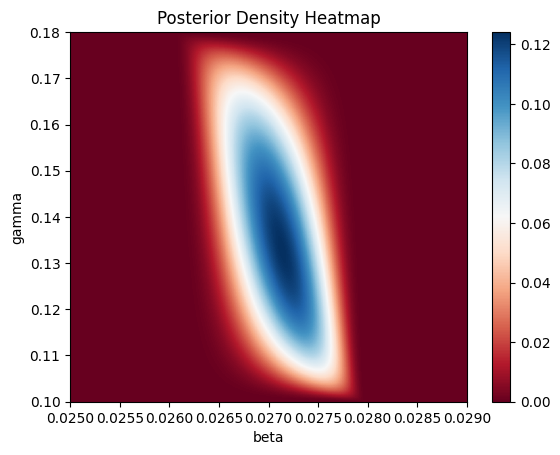

In [20]:
inferred_parameters = result_cal["inferred_parameters"]

betas, gammas = torch.meshgrid(torch.linspace(0.025, 0.029, 1000), torch.linspace(0.1, 0.18, 1000), indexing='ij')

density = posterior_density_petri_model(inferred_parameters=inferred_parameters, parameter_values={"beta": betas, "gamma": gammas})

fig, ax = plt.subplots()
c = ax.pcolormesh(betas, gammas, density, cmap='RdBu')
ax.set_title('Posterior Density Heatmap')
fig.colorbar(c, ax=ax)
ax.set_xlabel('beta')
ax.set_ylabel('gamma')

## load_and_optimize_and_sample_petri_model

In [ ]:
num_samples = 100
timepoints = [0.0, 1.0, 2.0, 3.0, 4.0]
OBJFUN = lambda x: np.abs(x)
INTERVENTION = [(0.1, "beta")]
QOI = ("scenario2dec_nday_average", "I_sol", 2)
# Run the optimization and sampling
result = load_and_optimize_and_sample_petri_model(
    ASKENET_PATH,
    num_samples,
    timepoints=timepoints,
    interventions=INTERVENTION,
    qoi=QOI,
    risk_bound=10.,
    objfun=OBJFUN,
    initial_guess=0.02,
    bounds=[[0.],[3.]],
    verbose=True,
)

ouu_samples = result["data"]
opt_policy = result["policy"]
# Save results
ouu_samples.to_csv(
    os.path.join(DEMO_PATH, "results_petri/optimize_sample_results.csv"), index=False
)
print("Optimal policy:", opt_policy["policy"])
print("Estimated risk at optimal policy", opt_policy["risk"])

## load_and_calibrate_and_optimize_and_sample_petri_model

In [ ]:
data_path = os.path.join(DEMO_PATH, "data.csv")
num_samples = 100
timepoints = [0.0, 1.0, 2.0, 3.0, 4.0]
OBJFUN = lambda x: np.abs(x)
INTERVENTION = [(0.1, "beta")]
QOI = ("scenario2dec_nday_average", "I_sol", 2)
# Run the calibration, optimization, and sampling
result = load_and_calibrate_and_optimize_and_sample_petri_model(
    ASKENET_PATH,
    data_path,
    num_samples,
    timepoints=timepoints,
    interventions=INTERVENTION,
    qoi=QOI,
    risk_bound=10.,
    objfun=OBJFUN,
    initial_guess=0.02,
    bounds=[[0.],[3.]],
    verbose=True,
)

ouu_cal_samples = result["data"]
opt_cal_policy = result["policy"]
# Save results
ouu_cal_samples.to_csv(
    os.path.join(DEMO_PATH, "results_petri/calibrate_optimize_sample_results.csv"), index=False
)
print("Optimal policy after calibration:", opt_policy["policy"])
print("Estimated risk at optimal policy after calibration", opt_policy["risk"])